In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, make_scorer, f1_score, r2_score

In [4]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 50

In [5]:
df = pd.read_csv('../UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
            'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_0',
            'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1',
            'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1',
            'default.payment.next.month']]

In [7]:
df.columns = ['lim_credito', 'sexo', 'educacao', 'est_civil', 'idade', 
            'situacao_1', 'situacao_2', 'situacao_3', 'situacao_4', 'situacao_5', 'situacao_6',
            'fatura_1', 'fatura_2', 'fatura_3', 'fatura_4', 'fatura_5', 'fatura_6',
            'v_pago_1', 'v_pago_2', 'v_pago_3', 'v_pago_4', 'v_pago_5', 'v_pago_6',
            'inadimplente']

In [8]:
X = df.loc[:, ~df.columns.str.startswith('inadimplente')]
y = df.loc[:, df.columns.str.startswith('inadimplente')]

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [10]:
X.head()

,lim_credito,sexo,educacao,est_civil,idade,situacao_1,situacao_2,situacao_3,situacao_4,situacao_5,situacao_6,fatura_1,fatura_2,fatura_3,fatura_4,fatura_5,fatura_6,v_pago_1,v_pago_2,v_pago_3,v_pago_4,v_pago_5,v_pago_6
0,20000.0,2,2,1,24,-2,-2,-1,-1,2,2,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0
1,120000.0,2,2,2,26,2,0,0,0,2,-1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0
4,50000.0,1,2,1,57,0,0,0,-1,0,-1,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0


In [11]:
X.situacao_1.value_counts(normalize=True)

situacao_1
 0    0.542867
-1    0.191333
-2    0.163167
 2    0.092200
 3    0.006133
 4    0.001633
 7    0.001533
 6    0.000633
 5    0.000433
 8    0.000067
Name: proportion, dtype: float64

In [12]:
df_pay = X.loc[:, X.columns.str.startswith('situacao')].copy()
df_pay['conta_atrasos'] = df_pay.apply(lambda row: (row > 0).sum(), axis=1)

In [13]:
df_pay.head()

,situacao_1,situacao_2,situacao_3,situacao_4,situacao_5,situacao_6,conta_atrasos
0,-2,-2,-1,-1,2,2,2
1,2,0,0,0,2,-1,2
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,-1,0,-1,0


In [14]:
X['conta_atrasos'] = df_pay['conta_atrasos'].copy()

In [15]:
X.reset_index(drop=True, inplace=True)

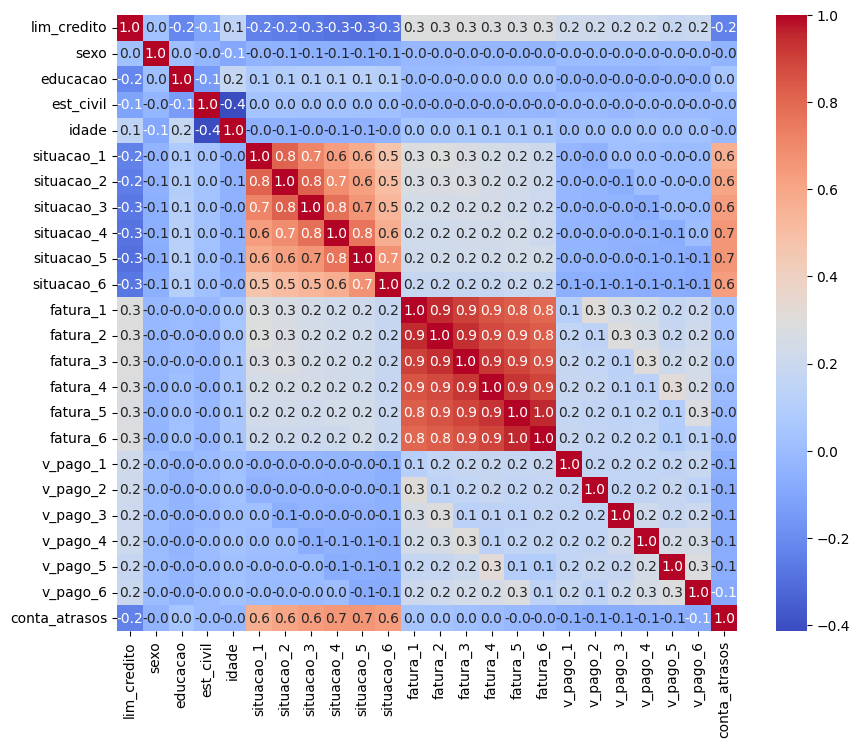

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True, fmt='.1f');

In [17]:
X_sem_sts = X.loc[:, ~X.columns.str.startswith('situacao')]
X_sem_sts.head()

,lim_credito,sexo,educacao,est_civil,idade,fatura_1,fatura_2,fatura_3,fatura_4,fatura_5,fatura_6,v_pago_1,v_pago_2,v_pago_3,v_pago_4,v_pago_5,v_pago_6,conta_atrasos
0,20000.0,2,2,1,24,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,2
1,120000.0,2,2,2,26,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,2
2,90000.0,2,2,2,34,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,50000.0,2,2,1,37,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,50000.0,1,2,1,57,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0


In [18]:
def zero_division(n, d):
    return n / d if d else 0

X_sem_sts_v1 = X_sem_sts.copy()

for i in range(1, 6):
    X_sem_sts_v1.loc[:, f'fat_pag_{i}'] = X_sem_sts_v1.apply(lambda row: zero_division(row[f'v_pago_{i+1}'], row[f'fatura_{i}']), axis=1).copy()

X_sem_sts_v1.head()

,lim_credito,sexo,educacao,est_civil,idade,fatura_1,fatura_2,fatura_3,fatura_4,fatura_5,fatura_6,v_pago_1,v_pago_2,v_pago_3,v_pago_4,v_pago_5,v_pago_6,conta_atrasos,fat_pag_1,fat_pag_2,fat_pag_3,fat_pag_4,fat_pag_5
0,20000.0,2,2,1,24,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,2,0.000000,0.000000,0.000000,1.000000,0.000000
1,120000.0,2,2,2,26,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,2,0.000000,0.289436,0.305623,0.372856,0.000000
2,90000.0,2,2,2,34,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0,0.064313,0.066899,0.069779,0.110628,0.108220
3,50000.0,2,2,1,37,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0,0.036180,0.037985,0.042382,0.040961,0.041465
4,50000.0,1,2,1,57,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0,0.036015,0.470072,0.477555,1.023608,0.352734


In [19]:
not_cols = ['fatura', 'v_pago']
X_sem_sts_v1 = X_sem_sts_v1.loc[:, ~X_sem_sts_v1.columns.str.startswith(tuple(not_cols))]
X_sem_sts_v1

,lim_credito,sexo,educacao,est_civil,idade,conta_atrasos,fat_pag_1,fat_pag_2,fat_pag_3,fat_pag_4,fat_pag_5
0,20000.0,2,2,1,24,2,0.000000,0.000000,0.000000,1.000000,0.000000
1,120000.0,2,2,2,26,2,0.000000,0.289436,0.305623,0.372856,0.000000
2,90000.0,2,2,2,34,0,0.064313,0.066899,0.069779,0.110628,0.108220
3,50000.0,2,2,1,37,0,0.036180,0.037985,0.042382,0.040961,0.041465
4,50000.0,1,2,1,57,0,0.036015,0.470072,0.477555,1.023608,0.352734
...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0.312891,0.097545,0.056850,0.095985,0.044084
29996,150000.0,1,3,2,43,0,0.000000,0.024855,1.002116,1.006853,1.004923
29997,30000.0,1,2,2,37,3,0.103322,0.204062,1.053741,0.000000,0.000000
29998,80000.0,1,3,1,41,1,1.082135,0.162463,0.022322,0.044677,1.095957


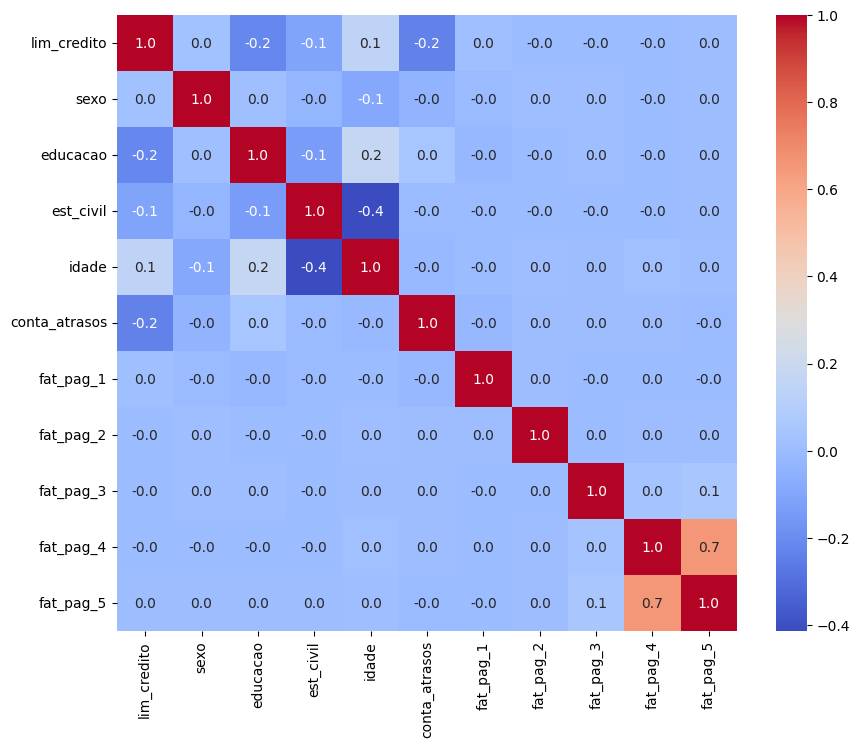

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_sem_sts_v1.corr(), cmap='coolwarm', annot=True, fmt='.1f');

Aplicando SKLearn

REGRESSÃO LOGÍSTICA

Caso mais tratado:

In [21]:
cat_cols = ['sexo', 'educacao', 'est_civil']
num_cols = [col for col in X_sem_sts_v1.columns if col not in cat_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X_sem_sts_v1, y, stratify=y, random_state=42)
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.63      0.26      0.37      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.61      0.62      7500
weighted avg       0.78      0.80      0.77      7500



Caso 2:

In [22]:
cat_cols = ['sexo', 'educacao', 'est_civil']
num_cols = [col for col in X_sem_sts.columns if col not in cat_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X_sem_sts, y, stratify=y, random_state=42)
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.64      0.26      0.37      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.61      0.62      7500
weighted avg       0.78      0.80      0.77      7500



Caso 3:

In [23]:
cat_cols = ['sexo', 'educacao', 'est_civil']
num_cols = [col for col in X.columns if col not in cat_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5841
           1       0.66      0.29      0.40      1659

    accuracy                           0.81      7500
   macro avg       0.74      0.62      0.64      7500
weighted avg       0.79      0.81      0.78      7500



Como os resultados não mudaram tanto, é benéfico para o modelo que ele seja treinado com menos variáveis.

KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

cat_cols = ['sexo', 'educacao', 'est_civil']
num_cols = [col for col in X_sem_sts_v1.columns if col not in cat_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

X_train, X_test, y_train, y_test = train_test_split(X_sem_sts_v1, y, stratify=y, random_state=42)
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      5841
           1       0.51      0.31      0.39      1659

    accuracy                           0.78      7500
   macro avg       0.67      0.61      0.63      7500
weighted avg       0.75      0.78      0.76      7500



Usar CV e GridSearch para tentar melhorar os parametros

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score

DUMMY

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='uniform')

X_train, X_test, y_train, y_test = train_test_split(X_sem_sts_v1, y, stratify=y, random_state=42)
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.51      0.61      5841
           1       0.22      0.48      0.30      1659

    accuracy                           0.50      7500
   macro avg       0.49      0.49      0.45      7500
weighted avg       0.65      0.50      0.54      7500

